In [1]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
#import CSV file
df = pd.read_csv("C:/Users/e0145653/Documents/WGU/D212 - Data Mining II/medical_clean.csv")

In [3]:
df.head(3)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.40342,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.99812,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.19246,2,4,4,4,3,4,3,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [5]:
#Removing columns not needed for this exercise
df.drop(['Customer_id', 'Interaction', 'UID', 'TimeZone', 'County', 'Zip', 'Lat', 'Lng', 
        'Area', 'Job', 'Item1', 'Item2', 'Item3', 'Item4','Item5','Item6', 'Item7', 'Item8'], axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   City                10000 non-null  object 
 2   State               10000 non-null  object 
 3   Population          10000 non-null  int64  
 4   Children            10000 non-null  int64  
 5   Age                 10000 non-null  int64  
 6   Income              10000 non-null  float64
 7   Marital             10000 non-null  object 
 8   Gender              10000 non-null  object 
 9   ReAdmis             10000 non-null  object 
 10  VitD_levels         10000 non-null  float64
 11  Doc_visits          10000 non-null  int64  
 12  Full_meals_eaten    10000 non-null  int64  
 13  vitD_supp           10000 non-null  int64  
 14  Soft_drink          10000 non-null  object 
 15  Initial_admin       10000 non-null  object 
 16  HighB

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

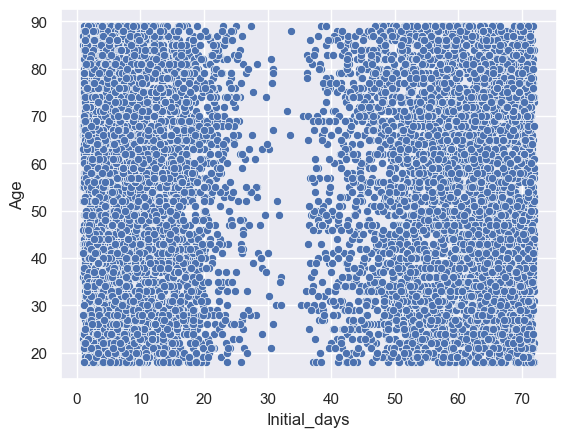

In [8]:
ax = sns.scatterplot(data = df,
                    x = 'Initial_days',
                    y = 'Age',
                    s = 35)

In [9]:
#Select variables of interest
clusterdata = df[['Initial_days', 'Age']].describe().round(2)

print(clusterdata)

       Initial_days       Age
count      10000.00  10000.00
mean          34.46     53.51
std           26.31     20.64
min            1.00     18.00
25%            7.90     36.00
50%           35.84     53.00
75%           61.16     71.00
max           71.98     89.00


In [10]:
#Normalize data using z-scores with StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [11]:
#fit & transform the data using the scaler
scaled_df = scaler.fit_transform(df[['Initial_days', 'Age']])

In [12]:
#create the scaled dataframe
scaled_df = pd.DataFrame(scaled_df, columns = ['Initial_days', 'Age'])

#Select variables of interest
clusterscaled = scaled_df[['Initial_days', 'Age']].describe().round(2)

#print the new scaled_df
print(clusterscaled)

#export this dataframe to csv file
scaled_df.to_csv("C:/Users/e0145653/Documents/WGU/D212 - Data Mining II/medical_scaled_df.csv")

       Initial_days       Age
count      10000.00  10000.00
mean          -0.00      0.00
std            1.00      1.00
min           -1.27     -1.72
25%           -1.01     -0.85
50%            0.05     -0.02
75%            1.02      0.85
max            1.43      1.72


In [13]:
#Perform KMeans Clustering
from sklearn.cluster import KMeans
k_model = KMeans(n_clusters = 2,
                n_init = 25,
                random_state = 122)

k_model.fit(scaled_df)

KMeans(n_clusters=2, n_init=25, random_state=122)

In [14]:
#Evaluate the model
labels = pd.Series(k_model.labels_).value_counts()
inertia = pd.Series(k_model.inertia_).value_counts()

print(labels, inertia)

1    5002
0    4998
dtype: int64 10801.851098    1
dtype: int64


In [15]:
#Create the Centroid DataFrame
centroid = pd.DataFrame(k_model.cluster_centers_,
                        columns = ['Initial_days', 'Age'])

print(centroid)

   Initial_days       Age
0     -0.959325 -0.015730
1      0.958557  0.015717


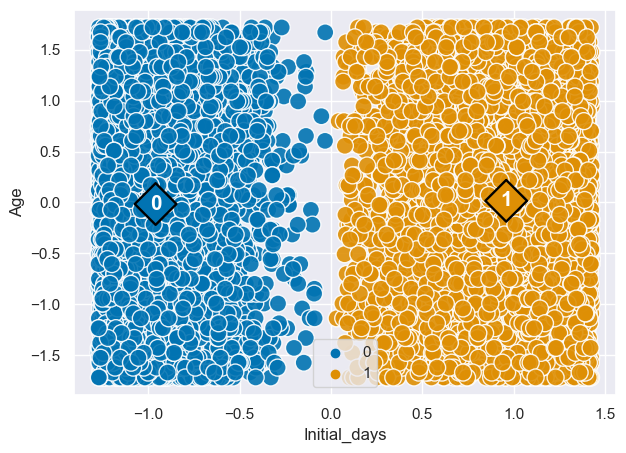

In [16]:
#Visualize the Centroid of the clusters
plt.figure(figsize=(7,5))

ax = sns.scatterplot(data = scaled_df, x = 'Initial_days', y = 'Age',
                    hue = k_model.labels_, palette = 'colorblind',
                    alpha = 0.9, s = 150, legend = True)

ax = sns.scatterplot(data = centroid, x = 'Initial_days', y = 'Age',
                    hue = centroid.index, palette = 'colorblind',
                    s = 450, marker = 'D', ec = 'black', legend = False)

for i in range(len(centroid)):
    plt.text(x = centroid.Initial_days[i], y = centroid.Age[i], s = i,
            horizontalalignment = 'center', verticalalignment = 'center',
            size = 15, weight = 'bold', color = 'white')

In [17]:
#Choose k-optimal values
wcss = []

for k in range (2,11):
    model = KMeans(n_clusters = k,
                  n_init = 50,
                  random_state = 122)
    model.fit(scaled_df)
    wcss.append(model.inertia_)

wcss_s = pd.Series(wcss, index = range(2,11))

In [18]:
print(wcss_s)

2     10801.851098
3      6924.266632
4      3315.879086
5      2601.918826
6      1925.795680
7      1677.316713
8      1437.820260
9      1322.423429
10     1207.404158
dtype: float64


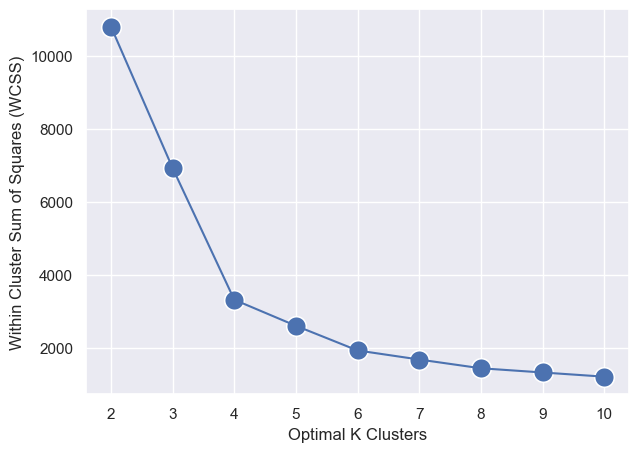

In [19]:
#Visualize the optimal K-value
plt.figure(figsize=(7,5))

ax = sns.lineplot(x = wcss_s.index,
                 y = wcss_s)

ax = sns.scatterplot(x = wcss_s.index,
                    y = wcss_s,
                    s = 200)

ax = ax.set(xlabel = 'Optimal K Clusters',
           ylabel = 'Within Cluster Sum of Squares (WCSS)')

In [20]:
#Apply the correct K-number to the model
fin_model = KMeans(n_clusters = 4,
                  n_init = 25,
                  random_state = 122)

fin_model.fit(scaled_df)

KMeans(n_clusters=4, n_init=25, random_state=122)

In [21]:
#Evaluate the model
labels = pd.Series(fin_model.labels_).value_counts()
inertia = pd.Series(fin_model.inertia_).value_counts()

print(labels, inertia)

1    2558
2    2516
0    2482
3    2444
dtype: int64 3315.879086    1
dtype: int64


In [22]:
#Create the Centroid DataFrame
centroid = pd.DataFrame(fin_model.cluster_centers_,
                        columns = ['Initial_days', 'Age'])

print(centroid)

   Initial_days       Age
0     -0.955687  0.856267
1      0.959359 -0.829140
2     -0.962913 -0.875943
3      0.957719  0.899983


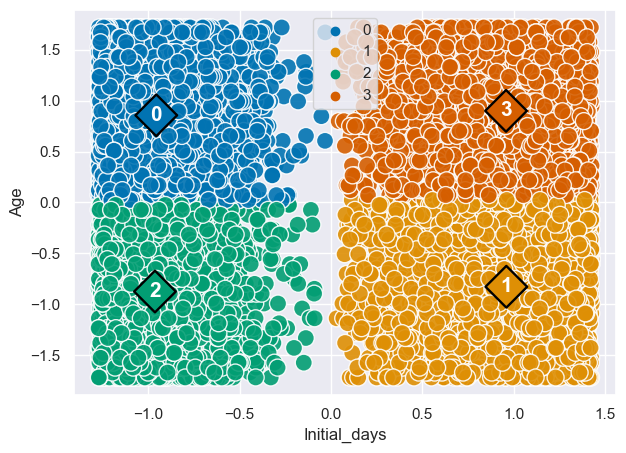

In [23]:
#Visualize the Centroid of the clusters
plt.figure(figsize=(7,5))

ax = sns.scatterplot(data = scaled_df, x = 'Initial_days', y = 'Age',
                    hue = fin_model.labels_, palette = 'colorblind',
                    alpha = 0.9, s = 150, legend = True)

ax = sns.scatterplot(data = centroid, x = 'Initial_days', y = 'Age',
                    hue = centroid.index, palette = 'colorblind',
                    s = 450, marker = 'D', ec = 'black', legend = False)

for i in range(len(centroid)):
    plt.text(x = centroid.Initial_days[i], y = centroid.Age[i], s = i,
            horizontalalignment = 'center', verticalalignment = 'center',
            size = 15, weight = 'bold', color = 'white')

In [24]:
#Label the unlabeled clusters
df['Cluster'] = fin_model.labels_.tolist()

customers = pd.get_dummies(df, columns = ['Gender', 'Marital', 'ReAdmis'])

In [25]:
customers.head()

,CaseOrder,City,State,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,...,Gender_Female,Gender_Male,Gender_Nonbinary,Marital_Divorced,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,ReAdmis_No,ReAdmis_Yes
0,1,Eva,AL,2951,1,53,86575.93,19.141466,6,0,...,0,1,0,1,0,0,0,0,1,0
1,2,Marianna,FL,11303,3,51,46805.99,18.940352,4,2,...,1,0,0,0,1,0,0,0,1,0
2,3,Sioux Falls,SD,17125,3,53,14370.14,18.057507,4,1,...,1,0,0,0,0,0,0,1,1,0
3,4,New Richland,MN,2162,0,78,39741.49,16.576858,4,1,...,0,1,0,0,1,0,0,0,1,0
4,5,West Point,VA,5287,1,22,1209.56,17.439069,5,0,...,1,0,0,0,0,0,0,1,1,0


In [26]:
customers.agg({
    'Gender_Female': 'mean',
    'Gender_Male': 'mean',
    'ReAdmis_No': 'mean',
    'ReAdmis_Yes': 'mean',
    'Marital_Divorced': 'mean',
    'Marital_Married': 'mean',
    'Marital_Never Married': 'mean',
    'Age': 'mean',
    'Initial_days': 'mean'
})

Gender_Female             0.501800
Gender_Male               0.476800
ReAdmis_No                0.633100
ReAdmis_Yes               0.366900
Marital_Divorced          0.196100
Marital_Married           0.202300
Marital_Never Married     0.198400
Age                      53.511700
Initial_days             34.455299
dtype: float64

In [27]:
customers.groupby('Cluster').agg({
    'Gender_Female': 'mean',
    'Gender_Male': 'mean',
    'ReAdmis_No': 'mean',
    'ReAdmis_Yes': 'mean',
    'Marital_Divorced': 'mean',
    'Marital_Married': 'mean',
    'Marital_Never Married': 'mean',
    'Age': 'mean',
    'Initial_days': 'mean'
})

,Gender_Female,Gender_Male,ReAdmis_No,ReAdmis_Yes,Marital_Divorced,Marital_Married,Marital_Never Married,Age,Initial_days
Cluster,,,,,,,,,
0,0.514504,0.461322,1.000000,0.000000,0.203062,0.208300,0.186543,71.182917,9.313054
1,0.489054,0.487881,0.268569,0.731431,0.180219,0.195074,0.210711,36.400313,59.694137
2,0.499603,0.483307,1.000000,0.000000,0.207075,0.198331,0.200318,35.434420,9.122968
3,0.504501,0.474223,0.264321,0.735679,0.194354,0.207856,0.195581,72.085106,59.650984
